In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("NKE_quarterly_financial_data.csv")
df.head()

,Quarter end,Shares,Shares split adjusted,Split factor,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,...,P/B ratio,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio
0,2019-05-31,1566888373,1566888373,1,23717000000,16525000000,14676700000,7866000000,9040000000,300000,...,14.65,32.76,6.75,0.3362,0.3832,0.3812,0.103,1.7,1.11,2.1008
1,2019-02-28,1571749591,1571749591,1,22921000000,15796000000,13960000000,7281000000,8961000000,0,...,13.78,58.82,6.53,0.3184,0.3867,0.3910,0.1079,1.71,0.54,2.1695
2,2018-11-30,1573797545,1573797545,1,22677000000,15566000000,13948000000,7278000000,8729000000,0,...,13.74,62.73,6.31,0.6062,0.3971,0.3849,0.0566,1.69,0.79,2.1388
3,2018-08-31,1588108352,1588108352,1,22483000000,15501000000,13491000000,6708000000,8992000000,0,...,12.63,67.91,6.09,0.6195,0.3856,0.3999,0.0557,1.63,0.61,2.3108
4,2018-05-31,1600554538,1600554538,1,22536000000,15134000000,12723700000,6040000000,9812000000,300000,...,11.26,64.48,5.89,0.6526,0.3534,0.4354,0.0531,1.57,1.23,2.5056


In [3]:
df['Date'] = pd.to_datetime(df['Quarter end'],format='%Y-%m-%d')
df.index = df['Date']

In [4]:
data = df.sort_index(ascending=True, axis=0)
print(data.columns)
data.head()


Index(['Quarter end', 'Shares', 'Shares split adjusted', 'Split factor',
       'Assets', 'Current Assets', 'Liabilities', 'Current Liabilities',
       'Shareholders equity', 'Non-controlling interest', 'Preferred equity',
       'Goodwill & intangibles', 'Long-term debt', 'Revenue', 'Earnings',
       'Earnings available for common stockholders', 'EPS basic',
       'EPS diluted', 'Dividend per share', 'Cash from operating activities',
       'Cash from investing activities', 'Cash from financing activities',
       'Cash change during period', 'Cash at end of period',
       'Capital expenditures', 'Price', 'Price high', 'Price low', 'ROE',
       'ROA', 'Book value of equity per share', 'P/B ratio', 'P/E ratio',
       'Cumulative dividends per share', 'Dividend payout ratio',
       'Long-term debt to equity ratio', 'Equity to assets ratio',
       'Net margin', 'Asset turnover', 'Free cash flow per share',
       'Current ratio', 'Date'],
      dtype='object')


,Quarter end,Shares,Shares split adjusted,Split factor,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,...,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio,Date
Date,,,,,,,,,,,,,,,,,,,,,
1994-11-30,1994-11-30,72283252,2313064064,32,2527755000,1882247000,666504000,587349000,1861251000,0,...,None,0.007812,None,0.0077,0.7363,None,None,None,3.2046,1994-11-30
1995-02-28,1995-02-28,72195732,2310263424,32,2963333000,1919963000,1044986000,907132000,1918347000,0,...,None,0.020000,None,0.0362,0.6474,None,None,-0.04,2.1165,1995-02-28
1995-05-31,1995-05-31,71529267,2288936544,32,3142745000,2045928000,1178056000,1107535000,1964689000,0,...,None,0.020000,None,0.0054,0.6252,None,None,0.03,1.8473,1995-05-31
1995-08-31,1995-08-31,71483995,2287487840,32,3323416000,2203127000,1220525000,1145270000,2102891000,0,...,None,0.020000,None,0.0067,0.6327,None,None,0.04,1.9237,1995-08-31
1995-11-30,1995-11-30,143240265,2291844240,16,3411413000,2276714000,1213771000,1147874000,2197642000,0,...,None,0.030000,None,0.0062,0.6442,None,None,-0.03,1.9834,1995-11-30


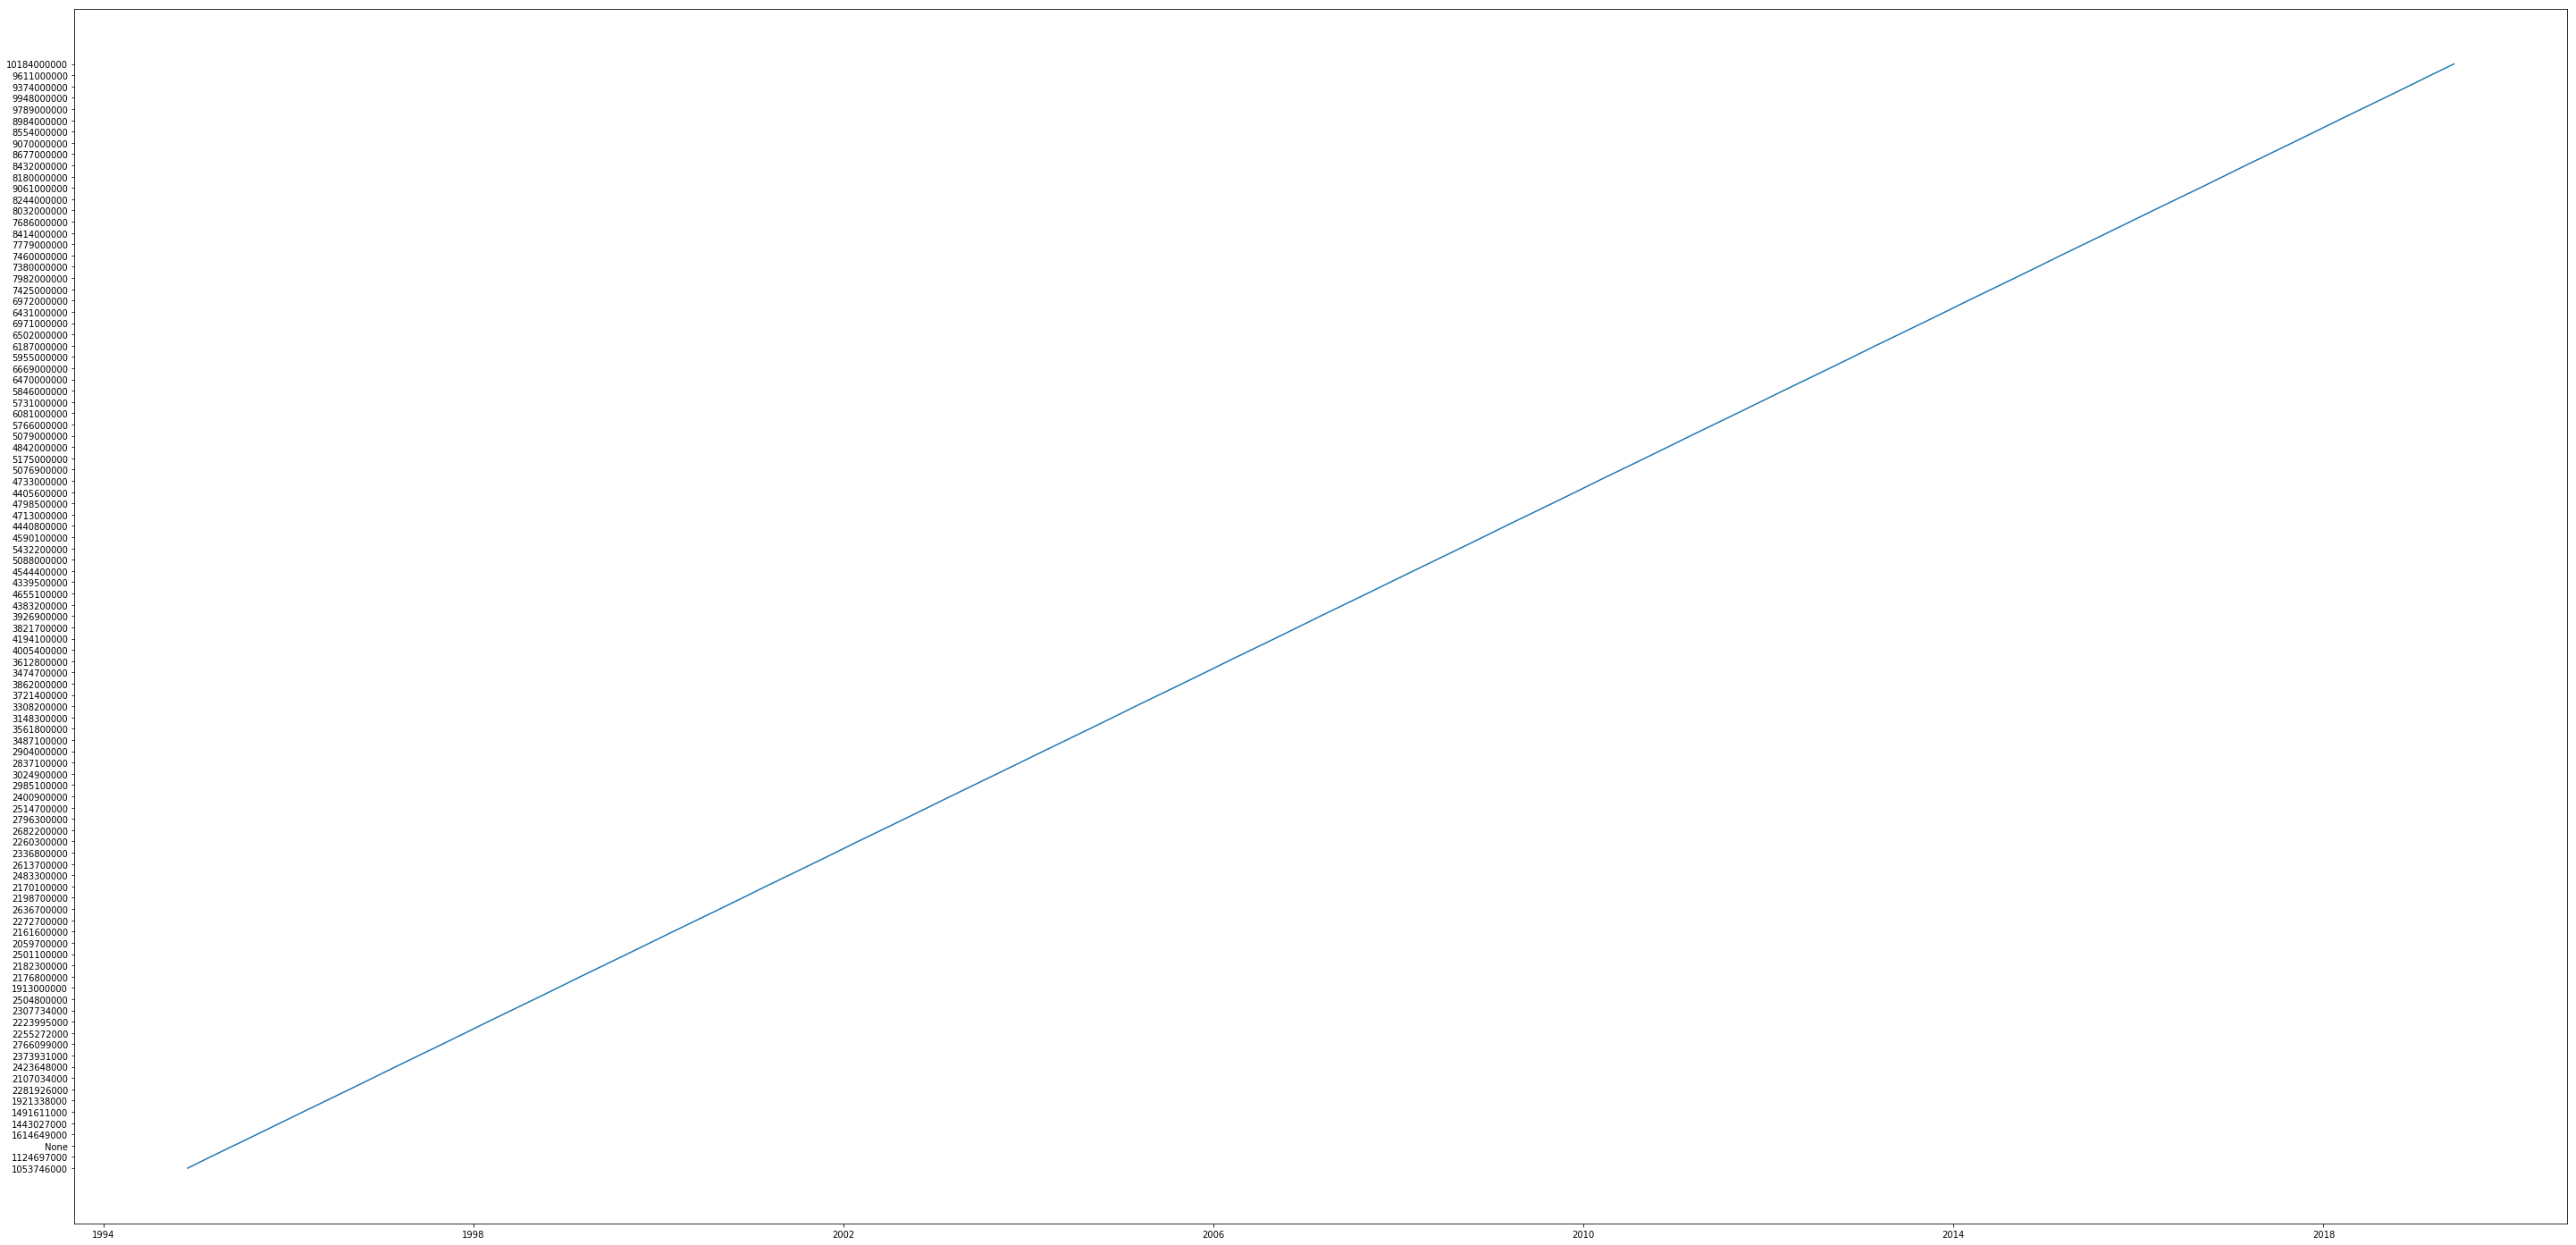

In [5]:
plt.figure(figsize=(50,25))
plt.plot(data['Date'],data['Revenue'], label='Close Price history')


In [6]:
data = data.iloc[3:]

In [7]:
# data['Revenue']
data = data.astype({'Revenue':'int64'})

In [8]:
new_data = data['Revenue']

In [9]:
from statsmodels.tsa.arima_model import ARIMA

In [10]:
new_data

Date
1995-08-31     1614649000
1995-11-30     1443027000
1996-02-29     1491611000
1996-05-31     1921338000
1996-08-31     2281926000
1996-11-30     2107034000
1997-02-28     2423648000
1997-05-31     2373931000
1997-08-31     2766099000
1997-11-30     2255272000
1998-02-28     2223995000
1998-05-31     2307734000
1998-08-31     2504800000
1998-11-30     1913000000
1999-02-28     2176800000
1999-05-31     2182300000
1999-08-31     2501100000
1999-11-30     2059700000
2000-02-29     2161600000
2000-05-31     2272700000
2000-08-31     2636700000
2000-11-30     2198700000
2001-02-28     2170100000
2001-05-31     2483300000
2001-08-31     2613700000
2001-11-30     2336800000
2002-02-28     2260300000
2002-05-31     2682200000
2002-08-31     2796300000
2002-11-30     2514700000
                 ...     
2012-02-29     5846000000
2012-05-31     6470000000
2012-08-31     6669000000
2012-11-30     5955000000
2013-02-28     6187000000
2013-05-31     6502000000
2013-08-31     6971000000
2013-11

In [11]:
train = new_data.loc['1995-08-31':'2012-05-31']
test = new_data.loc['2012-05-31':]

In [12]:
import chart_studio.plotly as ply
import cufflinks as cf

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
result = seasonal_decompose(train, model='multiplicative')

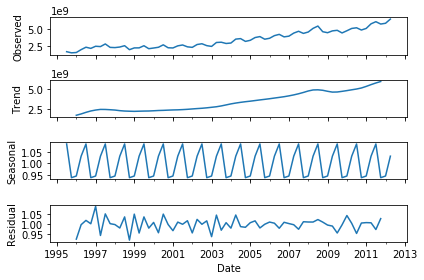

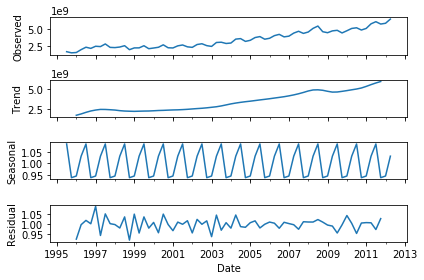

In [15]:
result.plot()

In [16]:
import pyramid
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())


C:\Anaconda3\lib\site-packages\pyramid\__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2276.088, BIC=2280.102, Fit time=3.292 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2275.607, BIC=2283.636, Fit time=0.660 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2278.688, BIC=2284.710, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=2273.333, BIC=2283.370, Fit time=0.517 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=2275.107, BIC=2287.151, Fit time=1.702 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=2271.992, BIC=2280.022, Fit time=0.331 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 0, 12); AIC=2273.610, BIC=2283.647, Fit time=0.460 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 0, 

In [17]:
future_forecast = stepwise_model.predict(n_periods=len(test))
future_forecast = pd.DataFrame(future_forecast,index=test.index,columns=['Prediction'])

In [18]:
future_forecast.head()

,Prediction
Date,
2012-05-31,6.506355e+09
2012-08-31,6.313980e+09
2012-11-30,6.465875e+09
2013-02-28,7.030650e+09
2013-05-31,7.076293e+09


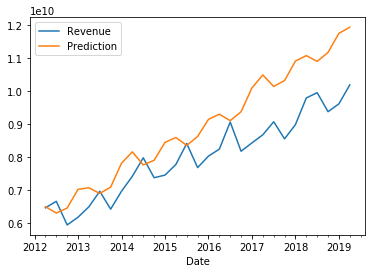

In [22]:
from plotly.offline import plot
x= pd.concat([test,future_forecast],axis=1).plot()

In [22]:
import matplotlib.pyplot as ply
%matplotlib inline

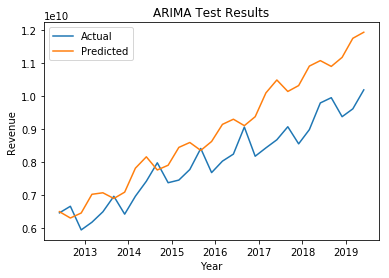

In [23]:
ply.plot(test.index,test,test.index,future_forecast)
plt.legend(['Actual','Predicted'])
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('ARIMA Test Results')
plt.show()